In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]= '3'

In [2]:
%matplotlib inline

import sys
sys.path.append("../../")

from train_model_norm import train

from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot, PredictionError

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['axes.facecolor'] = '#ffffff'
rcParams['lines.linewidth'] = 2.0

2023-08-22 00:13:54.670736: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
hyperparameter={
"num_nearest":60,
"sigma":10,
"learning_rate":0.001,
"batch_size":250,
"num_neuron":60,
"num_layers":2,
"size_embedded":50,
"num_nearest_geo":60,
"num_nearest_eucli":60,
"id_dataset":'sp',
"epochs":300,
"optimier":'adam',
"validation_split":0.1,
"label":'asi_sp',
"early_stopping": False,
"graph_label":'matrix',
}

# Model

In [4]:
spatial = train(**hyperparameter)

In [5]:
dataset,\
result,\
fit,\
embedded_train,\
embedded_test,\
predict_regression_train,\
predict_regression_test = spatial()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-08-22 00:13:56.451940: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-22 00:13:56.455804: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-22 00:13:56.456053: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-22 00:13:56.456731: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operation

Epoch 1/300


2023-08-22 00:13:58.804115: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-22 00:13:58.806611: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fb408014200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-22 00:13:58.806626: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-08-22 00:13:58.810129: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-22 00:13:58.899865: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


199/199 [==============================] - ETA: 0s - loss: 2.2162 - root_mean_squared_error: 4.2577
Epoch 1: val_loss improved from inf to 0.19945, saving model to /disk1/jupyter/smhan/ASI-revised/output/models/sp/asi_sp_weights.hdf5
199/199 [==============================] - 3s 5ms/step - loss: 2.2162 - root_mean_squared_error: 4.2577 - val_loss: 0.1995 - val_root_mean_squared_error: 0.2861 - lr: 0.0010
Epoch 2/300
191/199 [===========================>..] - ETA: 0s - loss: 0.0894 - root_mean_squared_error: 0.1448
Epoch 2: val_loss improved from 0.19945 to 0.06017, saving model to /disk1/jupyter/smhan/ASI-revised/output/models/sp/asi_sp_weights.hdf5
199/199 [==============================] - 1s 4ms/step - loss: 0.0882 - root_mean_squared_error: 0.1429 - val_loss: 0.0602 - val_root_mean_squared_error: 0.0898 - lr: 0.0010
Epoch 3/300
195/199 [============================>.] - ETA: 0s - loss: 0.0531 - root_mean_squared_error: 0.0791
Epoch 3: val_loss improved from 0.06017 to 0.04699, savi

Epoch 23/300
190/199 [===========================>..] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.0102
Epoch 23: val_loss improved from 0.00720 to 0.00703, saving model to /disk1/jupyter/smhan/ASI-revised/output/models/sp/asi_sp_weights.hdf5
199/199 [==============================] - 1s 4ms/step - loss: 0.0069 - root_mean_squared_error: 0.0103 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0108 - lr: 1.0000e-04
Epoch 24/300
192/199 [===========================>..] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0101
Epoch 24: val_loss did not improve from 0.00703
199/199 [==============================] - 1s 4ms/step - loss: 0.0068 - root_mean_squared_error: 0.0102 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0107 - lr: 1.0000e-04
Epoch 25/300
193/199 [============================>.] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0100
Epoch 25: val_loss did not improve from 0.00703
199/199 [==============================] - 1s 4ms/step - loss: 0.0067 

In [6]:
print('################# Test ##########################')
print('MALE test:.... {}'.format(result[0]))
print('RMSE test:.... {}'.format(result[1]))
print('MAPE test:.... {}'.format(result[2]))
print('################# Train ##########################')
print('MALE train:.... {}'.format(result[3]))
print('RMSE train:.... {}'.format(result[4]))
print('MAPE train:.... {}'.format(result[5]))

################# Test ##########################
MALE test:.... 0.009726186110765589
RMSE test:.... 9765.918674029608
MAPE test:.... 0.8057842030749839
################# Train ##########################
MALE train:.... 0.005262998103518219
RMSE train:.... 6828.041403226081
MAPE train:.... 0.3718912377450668


In [7]:
from sklearn.metrics import r2_score
import numpy as np

# metric
def metric(pred, label):
    assert label.shape == pred.shape
    
    with np.errstate(divide = 'ignore', invalid = 'ignore'):
        mask = np.not_equal(label, 0)
        mask = mask.astype(np.float32)
        mask /= np.mean(mask)
        male = np.abs(np.subtract(np.log(pred), np.log(label))).astype(np.float32)
        male = np.nan_to_num(male * mask)
        male = np.mean(male)
        mae = np.abs(np.subtract(pred, label)).astype(np.float32)
        rmse = np.square(mae)
        mape = np.divide(mae, label)
        mae = np.nan_to_num(mae * mask)
        mae = np.mean(mae)
        rmse = np.nan_to_num(rmse * mask)
        rmse = np.sqrt(np.mean(rmse))
        mape = np.nan_to_num(mape * mask)
        mape = np.median(mape) # np.mean(mape) -- author leverages median
    return male, rmse, mape



In [8]:
y_label = np.exp(dataset.y_test)
y_pred = np.exp(result[6].flatten())
metric(y_pred, y_label) # should be same value

(0.009726187, 9765.919, 0.008057842030750276)

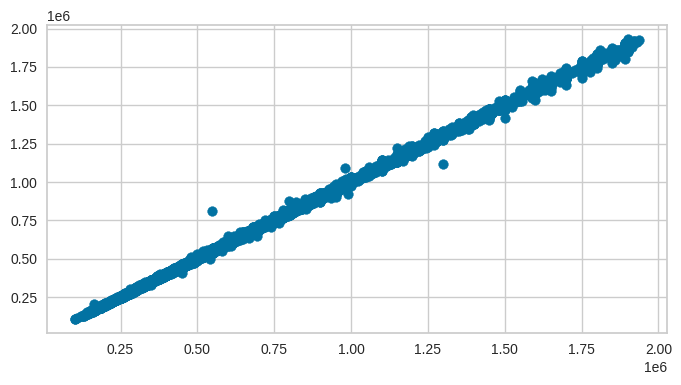

In [9]:
plt.scatter(y_label, y_pred)

NameError: name 'y_label' is not defined

# Display Model Training History

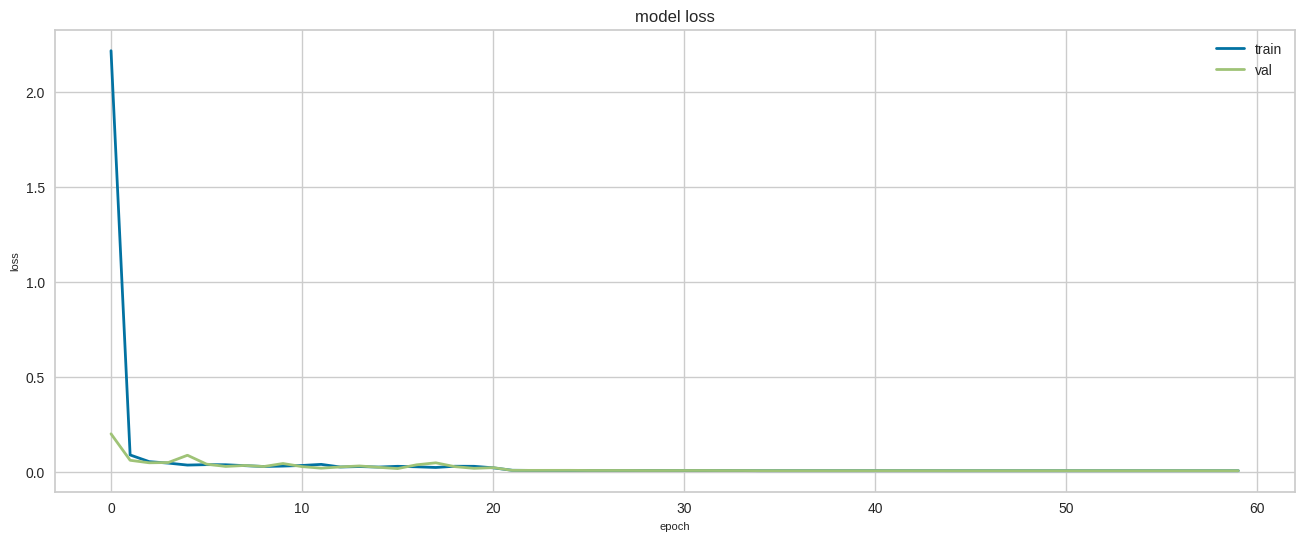

In [10]:
rcParams['figure.figsize'] = (16, 6)
# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Residue

## Raw

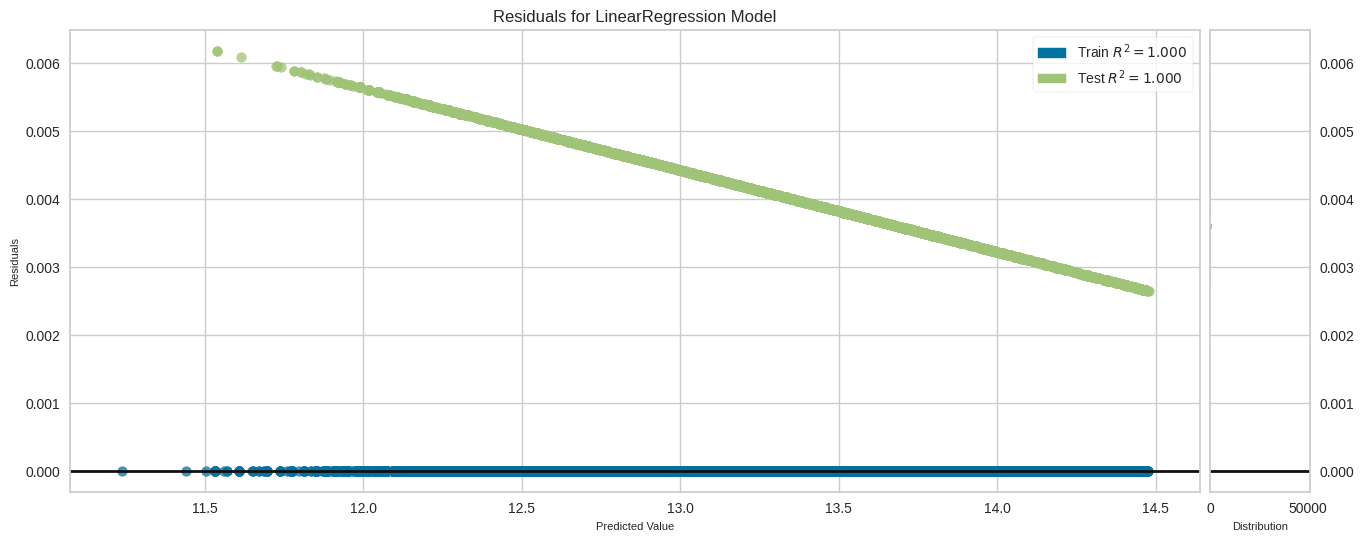

In [11]:
# Instantiate the linear model and visualizer
regressor = LinearRegression()
visualizer = ResidualsPlot(regressor);

visualizer.fit(dataset.X_train, dataset.y_train);  # Fit the training data to the model
visualizer.score(dataset.X_test, dataset.y_test);  # Evaluate the model on the test data
visualizer.poof();                 # Draw/show/poof the data

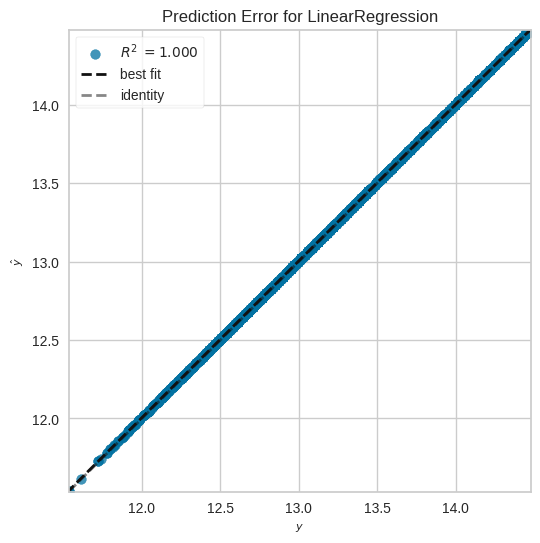

In [12]:
# Instantiate the linear model and visualizer
regression = LinearRegression()
visualizer = PredictionError(regression);

visualizer.fit(dataset.X_train, dataset.y_train);  # Fit the training data to the visualizer
visualizer.score(dataset.X_test, dataset.y_test);  # Evaluate the model on the test data
g = visualizer.poof();            # Draw/show/poof the data

## Embedded

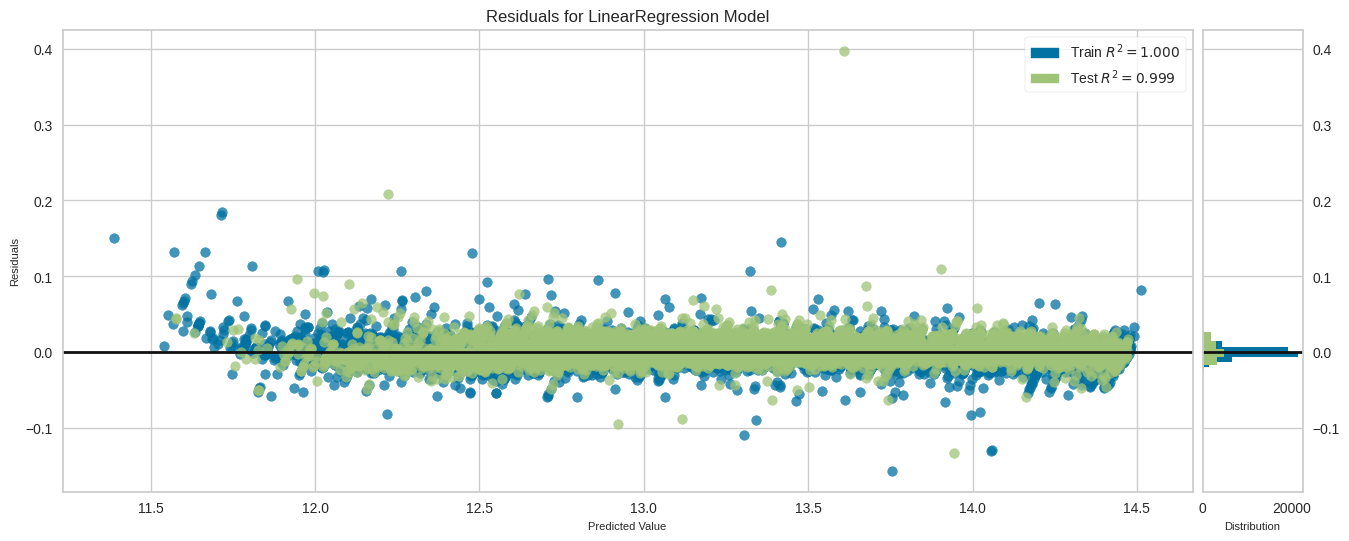

In [13]:
# Instantiate the linear model and visualizer
regressor = LinearRegression()
visualizer = ResidualsPlot(regressor)

visualizer.fit(embedded_train, dataset.y_train)  # Fit the training data to the model
visualizer.score(embedded_test, dataset.y_test)  # Evaluate the model on the test data
visualizer.poof();                 # Draw/show/poof the data

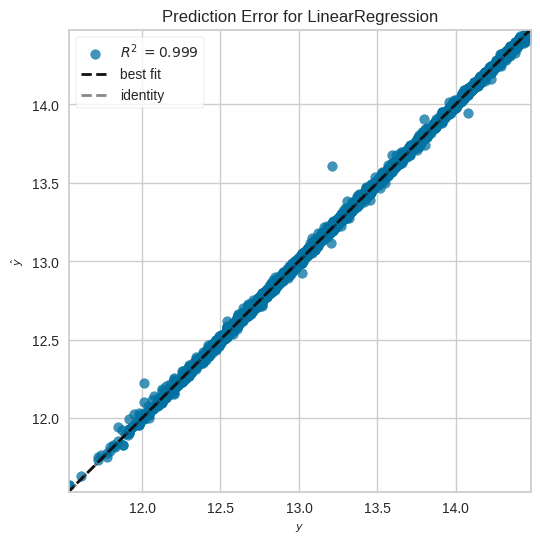

In [14]:
# Instantiate the linear model and visualizer
regression = LinearRegression()
visualizer = PredictionError(regression)

visualizer.fit(embedded_train, dataset.y_train)  # Fit the training data to the visualizer
visualizer.score(embedded_test, dataset.y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data